In [1]:
import serial
import time
arduino = serial.Serial('COM3', 345600)

In [3]:
command = str(5).encode()
print(command)
arduino.write(command)

b'5'


1

In [8]:
# arduino.open()
# create serial object named arduino

for i in range(10):
    i *= 10
    command = str(i).encode()
    print(command)
    arduino.write(command)
    time.sleep(3)
#     reachedPos = str(arduino.readline())           
#     print(reachedPos)

b'0'
b'10'
b'20'
b'30'
b'40'
b'50'


KeyboardInterrupt: 

In [1]:
arduino.close()

NameError: name 'arduino' is not defined

In [10]:
def get_best_face(faces):
    best_idx = 0
    best_w = 0
    for i,face in enumerate(faces):
        w = face[2]
        if w > best_w:
            best_w = w
            best_idx = i
    return faces[best_idx]

In [15]:
import numpy as np
import cv2
import time

faceCascade = cv2.CascadeClassifier('../Documents/GitHub/OpenCV-Face-Recognition/FaceDetection/Cascades/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
width = 320
height = 240
cap.set(3,width) # set Width
cap.set(4,height) # set Height

field_of_view = 400

while True:
    ret, img = cap.read()
    img = cv2.flip(img, 1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
    )
    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
        
        best_face_x = get_best_face(faces)[0] + get_best_face(faces)[2]/2

        angle = (best_face_x/width - 0.5) * field_of_view/2
        arduino.write(str(int(angle + 90)).encode())
        
        
        print(str(arduino.readline()))
#         print(str(int(angle)).encode())
        
        img = cv2.putText(img,str(int(angle)) , (20,30), cv2.FONT_HERSHEY_SIMPLEX ,  
                   1, (255,255,180), 2, cv2.LINE_AA) 
    
    cv2.imshow('video',img)

    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
        
cap.release()
cv2.destroyAllWindows()

b'ervo in position: 80\r\n'
b'Servo in position: 7575\r\n'
b'Servo in position: 83\r\n'
b'Servo in position: 85\r\n'
b'Servo in position: 90\r\n'
b'Servo in position: 102\r\n'
b'Servo in position: 113\r\n'
b'Servo in position: 118\r\n'
b'Servo in position: 116\r\n'
b'Servo in position: 122\r\n'
b'Servo in position: 125\r\n'
b'Servo in position: 125\r\n'
b'Servo in position: 123\r\n'
b'Servo in position: 118\r\n'
b'Servo in position: 106\r\n'
b'Servo in position: 91\r\n'
b'Servo in position: 73\r\n'
b'Servo in position: 60\r\n'
b'Servo in position: 46\r\n'
b'Servo in position: 38\r\n'
b'Servo in position: 31\r\n'
b'Servo in position: 33\r\n'
b'Servo in position: 70\r\n'
b'Servo in position: 70\r\n'
b'Servo in position: 72\r\n'
b'Servo in position: 77\r\n'
b'Servo in position: 80\r\n'
b'Servo in position: 66\r\n'


In [61]:
cap.release()
cv2.destroyAllWindows()

In [78]:
str(int(angle)).encode()

b'41'

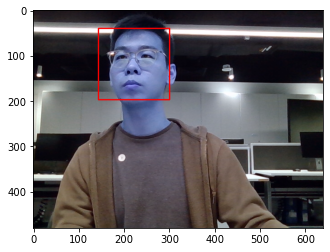

In [106]:
import matplotlib.pyplot as plt
plt.imshow(cv2.flip(img, 1))